# Plot Maps of the Service Territory for the Balancing Authorities Analyzed


In [1]:
# Start by importing the packages we need:
import os
import yaml

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable


## Set the Directory Structure


In [6]:
# Identify the data and impage input and output directories:
ba_mapping_data_input_dir =  '/Users/burl878/Documents/Code/code_repos/tell/tell/tell_data/tell_quickstarter_data/outputs/ba_service_territory/'
county_shapefile_input_dir = '/Users/burl878/Documents/Code/code_repos/tell/tell/tell_data/tell_raw_data/County_Shapefiles/'
state_shapefile_input_dir = '/Users/burl878/Documents/Code/code_repos/tell/tell/tell_data/tell_raw_data/State_Shapefiles/'
ba_to_process_input_dir =  '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2025_ldrd/data/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/burleyson-etal_2025_ldrd/figures/'


## Set the List of Balancing Authorities to Plot

BAs used in this analysis are controlled by a master file `balancing_authorities_modeled.yml` stored in the `/data` directory.

In [7]:
# Read the yml file into a dictionary:
with open((ba_to_process_input_dir + 'balancing_authority_modeled.yml'), 'r') as yml:
     ba_list = yaml.load(yml, Loader=yaml.FullLoader)
     bas = [i for i in ba_list.keys()]

# Return the list of BAs to process/plot:
bas


['AZPS', 'BPAT', 'CISO', 'ERCO', 'FPL', 'ISNE', 'PJM', 'SWPP']

## Create the Function to Plot the Service Territory for a Set of Balancing Authorities


In [4]:
def plot_ba_service_territory(bas_to_plot: str, ba_mapping_data_input_dir: str, county_shapefile_input_dir: str, state_shapefile_input_dir: str,
                              image_output_dir: str, image_resolution: int, save_images=False):
    
    # Read in the county shapefile and reassign the 'FIPS' variable as integers:
    counties_df = gpd.read_file(os.path.join(county_shapefile_input_dir, r'tl_2020_us_county.shp')).rename(columns={'GEOID': 'County_FIPS'})
    counties_df['County_FIPS'] = counties_df['County_FIPS'].astype(int)

    # Read in the BA mapping file:
    ba_mapping_df = pd.read_csv((os.path.join(ba_mapping_data_input_dir, 'ba_service_territory_2019.csv')), index_col=None, header=0)

    # Merge the ba_mapping_df and counties_df together using county FIPS codes to join them:
    counties_df = counties_df.merge(ba_mapping_df, on='County_FIPS', how='left')

    # Subset to only the BA you want to plot:
    counties_subset_df = counties_df.loc[counties_df['BA_Code'].isin(bas_to_plot)]
    
    # Read in the state shapefile:
    states_df = gpd.read_file(os.path.join(state_shapefile_input_dir, 'tl_2020_us_state.shp')).rename(columns={'NAME': 'State'})
    
    # Create the figure:
    fig, ax = plt.subplots(1, 1, figsize=(25, 10))
    plt.rcParams['font.size'] = 18
    ax1 = counties_subset_df.plot(ax=ax, column='BA_Code', edgecolor='black', linewidth=1, legend=True, legend_kwds={'loc': 'lower right'})
    ax2 = states_df.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)
    ax.set_xlim(-126.4, -66);
    ax.set_xlabel('Longitude', fontsize=18); 
    ax.set_ylim(24, 50); 
    ax.set_ylabel('Latitude', fontsize=18);
    ax.set_title('Approximate Balancing Authority Service Territory in 2019', fontsize=21)

    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       plt.savefig(os.path.join(image_output_dir + 'BA_Service_Territory.png'), dpi=image_resolution, bbox_inches='tight')


## Make the Plot


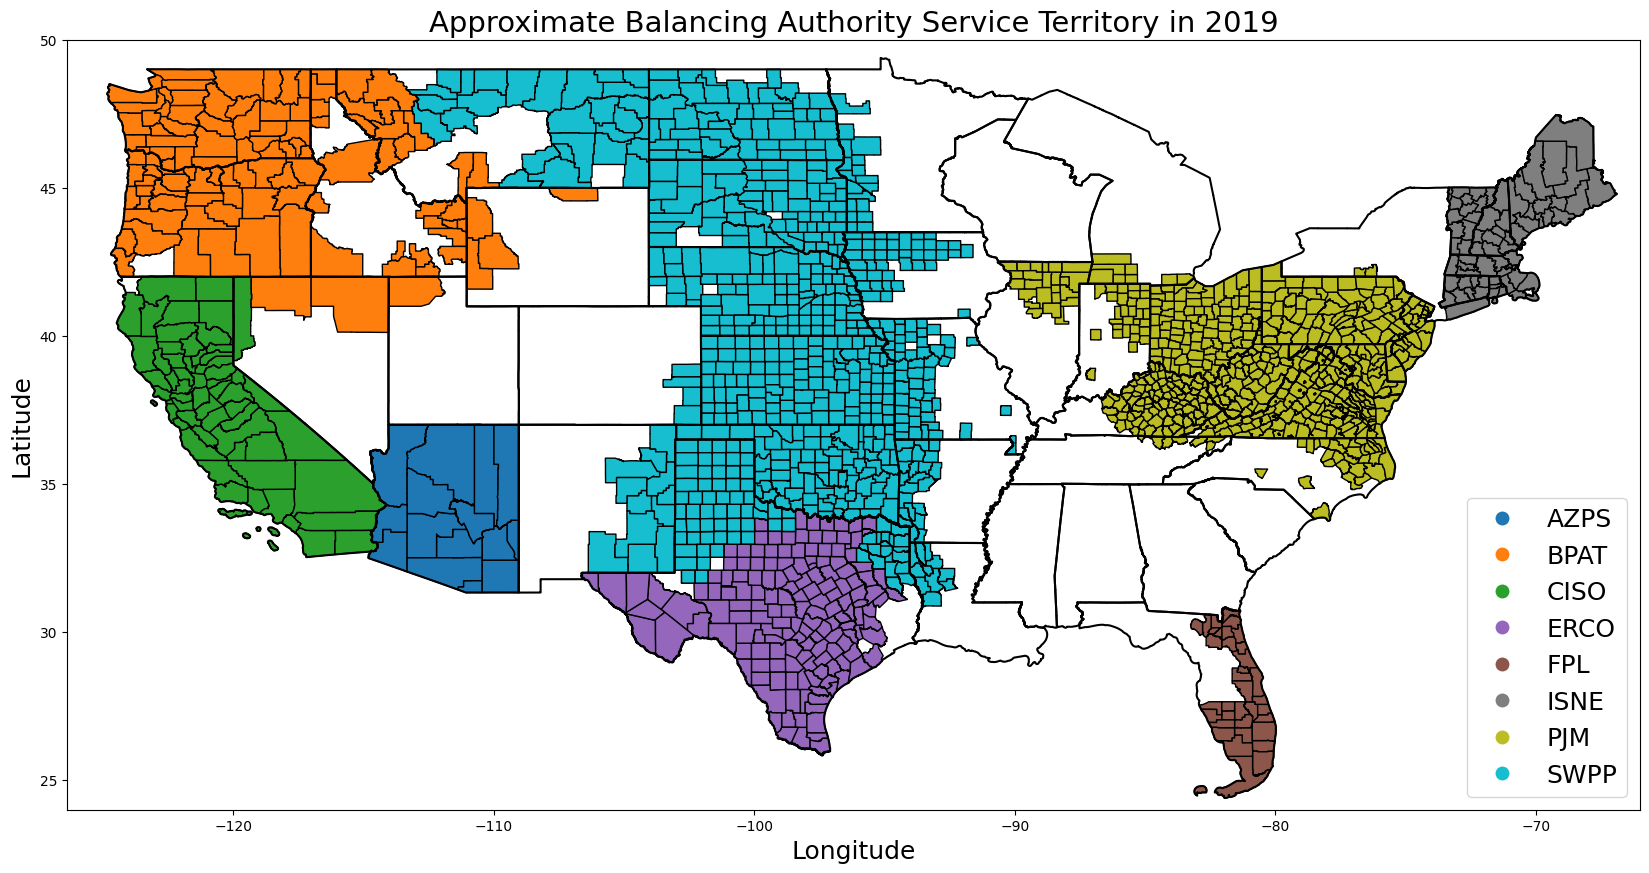

In [5]:
plot_ba_service_territory(bas_to_plot = bas,
                          ba_mapping_data_input_dir = ba_mapping_data_input_dir, 
                          county_shapefile_input_dir = county_shapefile_input_dir,
                          state_shapefile_input_dir = state_shapefile_input_dir,
                          image_output_dir = image_output_dir, 
                          image_resolution = 300, 
                          save_images = True)
